In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = './data'

train_file = data_dir + '/train.json'
test_file = data_dir + '/test.json'

In [14]:
train = pd.read_json(train_file)
print(train.shape)
train.head(1)

(1604, 5)


,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0


In [36]:
print(len(train['band_1'][0]))
print(75*75)

5625
5625


In [50]:
#band1 = train['band_1'].apply(lambda x: np.array(x).astype(np.float32).reshape(75, 75))
#band1 = np.array(band1)
#band2 = train['band_2'].apply(lambda x: np.array(x).astype(np.float32).reshape(75, 75))
#band2 = np.array(band2)
#bands = np.stack((band1, band2, .5 * (band1 + band2)), axis=-1)
#bands.shape

band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
bands = np.stack((band1, band2,  0.5 * (band1 + band2)), axis=-1)
print(bands.dtype)
bands.shape

float32


(1604, 75, 75, 3)

In [22]:
def try_type(x, type_func):
    try:
        return type_func(x)
    except:
        return np.nan
inc = train['inc_angle'].apply(lambda x: try_type(x, np.float32))
inc = inc.fillna(inc.mean())
inc.head()

0    43.923901
1    38.156200
2    45.285900
3    43.830601
4    35.625599
Name: inc_angle, dtype: float64

In [34]:
labels = train['is_iceberg']
print(labels.dtype)
labels.shape

int64


(1604,)

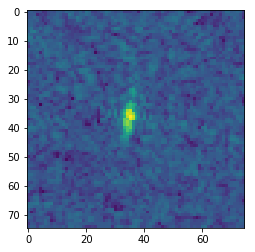

In [77]:
# tf.image.random_brightness(bands[0], max_delta=20, seed=7)
# plt.imshow(bands[0])
# tf.image.random_brightness(bands[0], 20, 7)
plt.imshow(bands[0][:, :, 0])
# print(bands[0][:, :, 0].shape)

In [43]:
# register one tensorflow session to use its api
sess = tf.Session()

# data augmentation

(1604, 75, 75, 3)


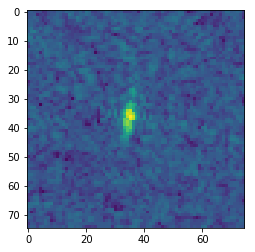

In [81]:
# random brightness
rand_br = tf.image.adjust_brightness(bands, delta=.8)
rand_br = sess.run(rand_br)
print(rand_br.shape)
plt.imshow(rand_br[0])
plt.imshow(rand_br[0][:, :, 0])

In [75]:
# random left right flip
#rand_lr = np.array([tf.image.random_flip_left_right(b, seed=8) for b in bands])
#rand_lr = sess.run(rand_lr)
#print(rand_lr.shape)
#plt.imshow(rand_lr[0])
flip_lr = np.array([sess.run(tf.image.flip_left_right(b)) for b in bands])
# flip_lr = sess.run(flip_lr)
plt.imshow(flip_lr[0][:, :, 0])

KeyboardInterrupt: 

In [ ]:
# rand